In [480]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings

# Loading Data

In [481]:
iris = load_iris()

# Creating Pandas DataFrame

In [482]:
df = pd.DataFrame(data=iris.data, columns = iris.feature_names)

In [483]:
df['target'] = iris.target

In [484]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Summary Statistics

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [486]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [487]:
df.groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


# Data Visualisation

In [488]:
x = [df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'], df['petal width (cm)']]

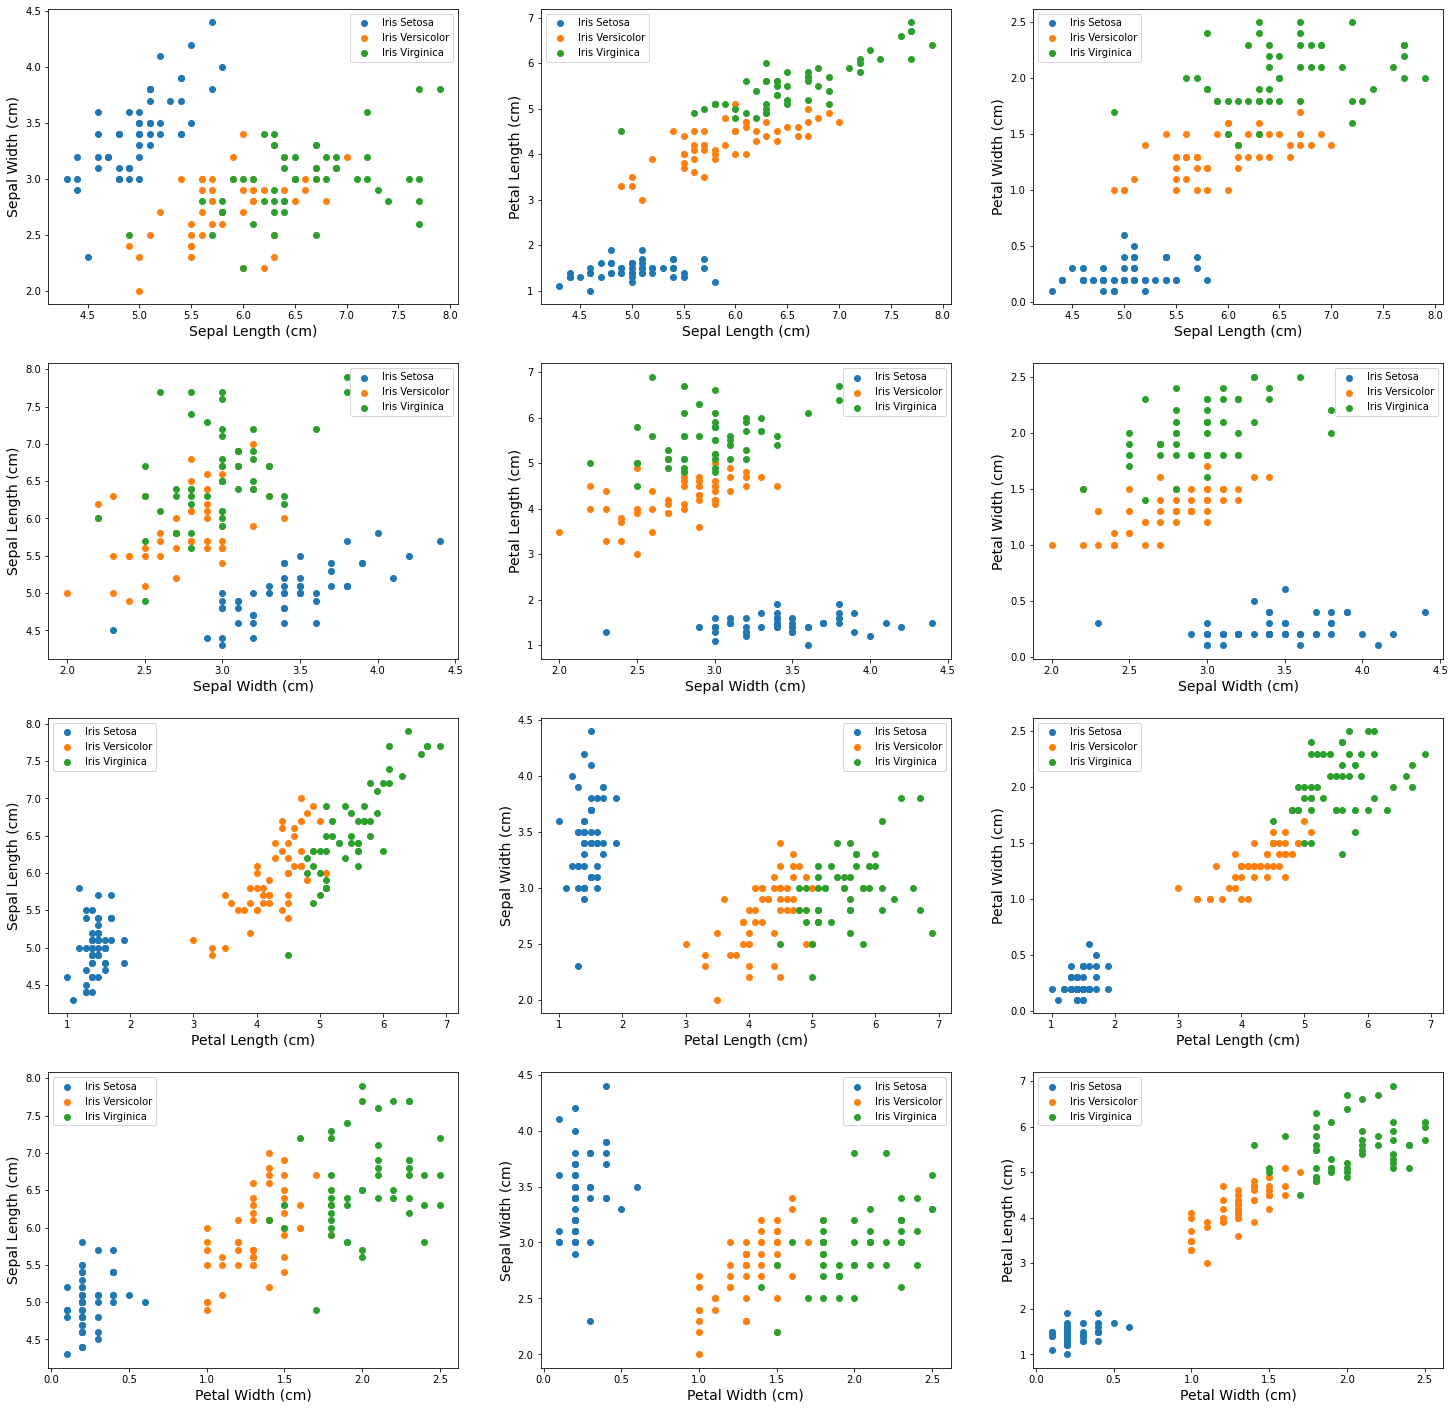

In [489]:
plt.figure(figsize = (25,25))
plt.subplot(4,3,1)
plt.scatter(x[0][:50], x[1][:50], label = 'Iris Setosa')
plt.scatter(x[0][50:100], x[1][50:100], label = 'Iris Versicolor')
plt.scatter(x[0][100:150], x[1][100:150], label = 'Iris Virginica')
plt.xlabel('Sepal Length (cm)', fontsize=14)
plt.ylabel('Sepal Width (cm)', fontsize=14)
plt.legend()
plt.subplot(4,3,2)
plt.scatter(x[0][:50], x[2][:50], label = 'Iris Setosa')
plt.scatter(x[0][50:100], x[2][50:100], label = 'Iris Versicolor')
plt.scatter(x[0][100:150], x[2][100:150], label = 'Iris Virginica')
plt.xlabel('Sepal Length (cm)', fontsize=14)
plt.ylabel('Petal Length (cm)', fontsize=14)
plt.legend()
plt.subplot(4,3,3)
plt.scatter(x[0][:50], x[3][:50], label = 'Iris Setosa')
plt.scatter(x[0][50:100], x[3][50:100], label = 'Iris Versicolor')
plt.scatter(x[0][100:150], x[3][100:150], label = 'Iris Virginica')
plt.xlabel('Sepal Length (cm)', fontsize=14)
plt.ylabel('Petal Width (cm)', fontsize=14)
plt.legend()
plt.subplot(4,3,4)
plt.scatter(x[1][:50], x[0][:50], label = 'Iris Setosa')
plt.scatter(x[1][50:100], x[0][50:100], label = 'Iris Versicolor')
plt.scatter(x[1][100:150], x[0][100:150], label = 'Iris Virginica')
plt.xlabel('Sepal Width (cm)', fontsize=14)
plt.ylabel('Sepal Length (cm)', fontsize=14)
plt.legend()
plt.subplot(4,3,5)
plt.scatter(x[1][:50], x[2][:50], label = 'Iris Setosa')
plt.scatter(x[1][50:100], x[2][50:100], label = 'Iris Versicolor')
plt.scatter(x[1][100:150], x[2][100:150], label = 'Iris Virginica')
plt.xlabel('Sepal Width (cm)', fontsize=14)
plt.ylabel('Petal Length (cm)', fontsize=14)
plt.legend()
plt.subplot(4,3,6)
plt.scatter(x[1][:50], x[3][:50], label = 'Iris Setosa')
plt.scatter(x[1][50:100], x[3][50:100], label = 'Iris Versicolor')
plt.scatter(x[1][100:150], x[3][100:150], label = 'Iris Virginica')
plt.xlabel('Sepal Width (cm)', fontsize=14)
plt.ylabel('Petal Width (cm)', fontsize=14)
plt.legend()
plt.subplot(4,3,7)
plt.scatter(x[2][:50], x[0][:50], label = 'Iris Setosa')
plt.scatter(x[2][50:100], x[0][50:100], label = 'Iris Versicolor')
plt.scatter(x[2][100:150], x[0][100:150], label = 'Iris Virginica')
plt.xlabel('Petal Length (cm)', fontsize=14)
plt.ylabel('Sepal Length (cm)', fontsize=14)
plt.legend()
plt.subplot(4,3,8)
plt.scatter(x[2][:50], x[1][:50], label = 'Iris Setosa')
plt.scatter(x[2][50:100], x[1][50:100], label = 'Iris Versicolor')
plt.scatter(x[2][100:150], x[1][100:150], label = 'Iris Virginica')
plt.xlabel('Petal Length (cm)', fontsize=14)
plt.ylabel('Sepal Width (cm)', fontsize=14)
plt.legend()
plt.subplot(4,3,9)
plt.scatter(x[2][:50], x[3][:50], label = 'Iris Setosa')
plt.scatter(x[2][50:100], x[3][50:100], label = 'Iris Versicolor')
plt.scatter(x[2][100:150], x[3][100:150], label = 'Iris Virginica')
plt.xlabel('Petal Length (cm)', fontsize=14)
plt.ylabel('Petal Width (cm)', fontsize=14)
plt.legend()
plt.subplot(4,3,10)
plt.scatter(x[3][:50], x[0][:50], label = 'Iris Setosa')
plt.scatter(x[3][50:100], x[0][50:100], label = 'Iris Versicolor')
plt.scatter(x[3][100:150], x[0][100:150], label = 'Iris Virginica')
plt.xlabel('Petal Width (cm)', fontsize=14)
plt.ylabel('Sepal Length (cm)', fontsize=14)
plt.legend()
plt.subplot(4,3,11)
plt.scatter(x[3][:50], x[1][:50], label = 'Iris Setosa')
plt.scatter(x[3][50:100], x[1][50:100], label = 'Iris Versicolor')
plt.scatter(x[3][100:150], x[1][100:150], label = 'Iris Virginica')
plt.xlabel('Petal Width (cm)', fontsize=14)
plt.ylabel('Sepal Width (cm)', fontsize=14)
plt.legend()
plt.subplot(4,3,12)
plt.scatter(x[3][:50], x[2][:50], label = 'Iris Setosa')
plt.scatter(x[3][50:100], x[2][50:100], label = 'Iris Versicolor')
plt.scatter(x[3][100:150], x[2][100:150], label = 'Iris Virginica')
plt.xlabel('Petal Width (cm)', fontsize=14)
plt.ylabel('Petal Length (cm)', fontsize=14)
plt.legend()
plt.show()

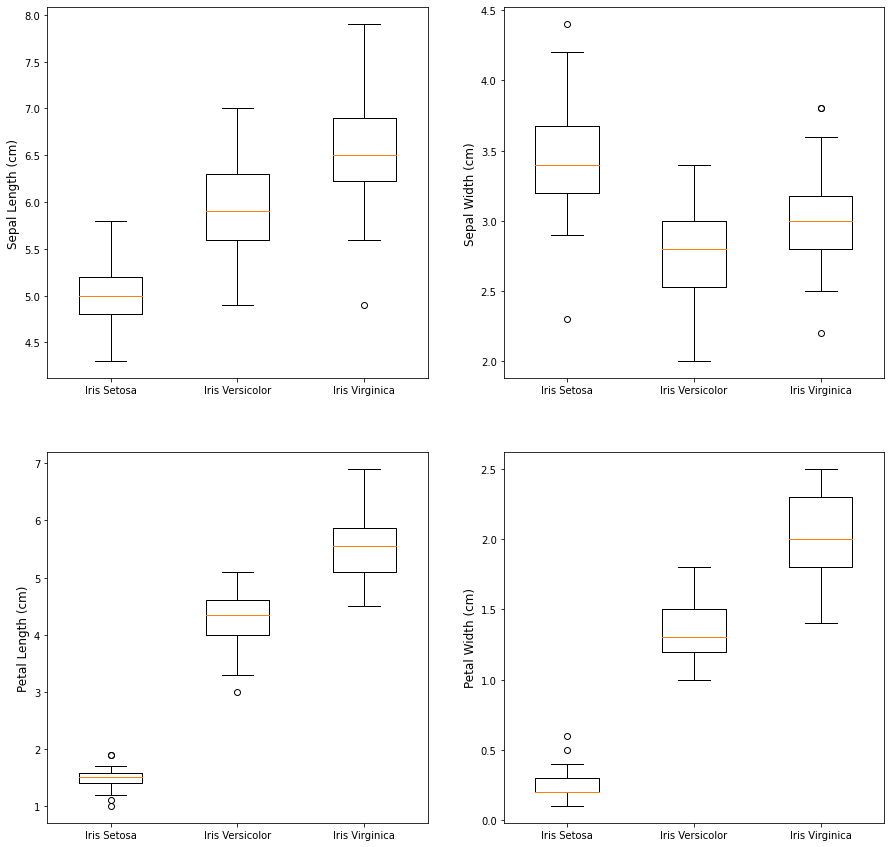

In [490]:
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plt.boxplot([df['sepal length (cm)'][:50], df['sepal length (cm)'][50:100], df['sepal length (cm)'][100:150]], labels= ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica'], widths = 0.5, vert=True)
plt.ylabel('Sepal Length (cm)', fontsize=12)
plt.subplot(2,2,2)
plt.boxplot([df['sepal width (cm)'][:50], df['sepal width (cm)'][50:100], df['sepal width (cm)'][100:150]], labels= ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica'], widths = 0.5, vert=True)
plt.ylabel('Sepal Width (cm)', fontsize=12)
plt.subplot(2,2,3)
plt.boxplot([df['petal length (cm)'][:50], df['petal length (cm)'][50:100], df['petal length (cm)'][100:150]], labels= ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica'], widths = 0.5, vert=True)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.subplot(2,2,4)
plt.boxplot([df['petal width (cm)'][:50], df['petal width (cm)'][50:100], df['petal width (cm)'][100:150]], labels= ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica'], widths = 0.5, vert=True)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.show()

# Train-Test Split

In [491]:
X = df.drop(columns = 'target', axis=1) 
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [492]:
len(X_test)

30

In [493]:
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# K Nearest Neighbours Algorithm (Classifier)

## Elbow Method

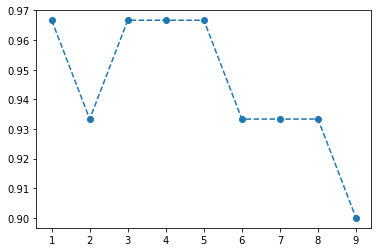

In [494]:
k = np.arange(1, 10)
scores = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

plt.plot(k, scores, '--')
plt.scatter(k, scores)
plt.show()

## Classification

In [495]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1,
       2, 1, 0, 1, 0, 0, 1, 2])

## Model Evaluation

In [496]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667

In [497]:
misclassified = np.where(y_test != y_pred)
misclassified

(array([22], dtype=int64),)

### Confusion Matrix

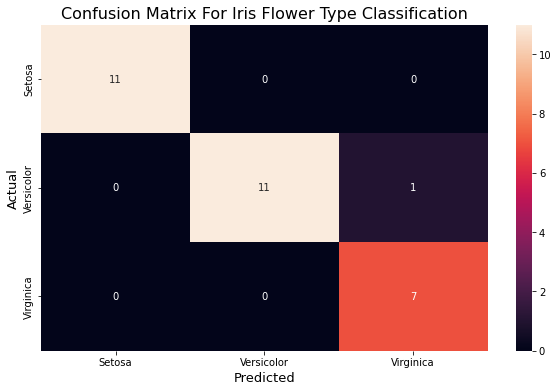

In [498]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, y_pred)
x_labels = ['Setosa', 'Versicolor', 'Virginica']
sns.heatmap(cm, xticklabels = x_labels, yticklabels = x_labels, annot=True)
plt.title('Confusion Matrix For Iris Flower Type Classification', fontsize=16)
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.show()

# Support Vector Machine

In [499]:
from sklearn.svm import SVC # Importing the svm classifier

## Splitting the Dataset

In [500]:
X = df.drop(columns = ['target', 'sepal width (cm)', 'sepal length (cm)'])
y = df['target']

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [502]:
X_train

,petal length (cm),petal width (cm)
23,1.7,0.5
35,1.2,0.2
16,1.3,0.4
0,1.4,0.2
8,1.4,0.2
...,...,...
118,6.9,2.3
61,4.2,1.5
143,5.9,2.3
62,4.0,1.0


## Training the Model 

In [503]:
model = SVC(kernel='linear')

In [504]:
model.fit(X_train, y_train)

SVC(kernel='linear')

## Testing and Predictions

In [505]:
y_pred = model.predict(X_test)

In [506]:
y_pred

array([0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 0])

## Model Evaluation

In [507]:
svc_accuracy = accuracy_score(y_test, y_pred)

In [508]:
svc_accuracy

0.9736842105263158

In [509]:
np.array(y_test)

array([0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 0])

In [510]:
misclassifications = np.where(y_test != y_pred)

In [511]:
misclassifications

(array([2], dtype=int64),)

We have 1 misclassified element. Our model predicted iris virginica when it really was iris versicolor. This makes sense because there is some overlap between these two types of iris flower and this can be observed in the visualisation above.

## Plotting the Decision Boundary

In [512]:
xx, yy = np.meshgrid(np.arange(0, 10, 0.01), np.arange(0, 10, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

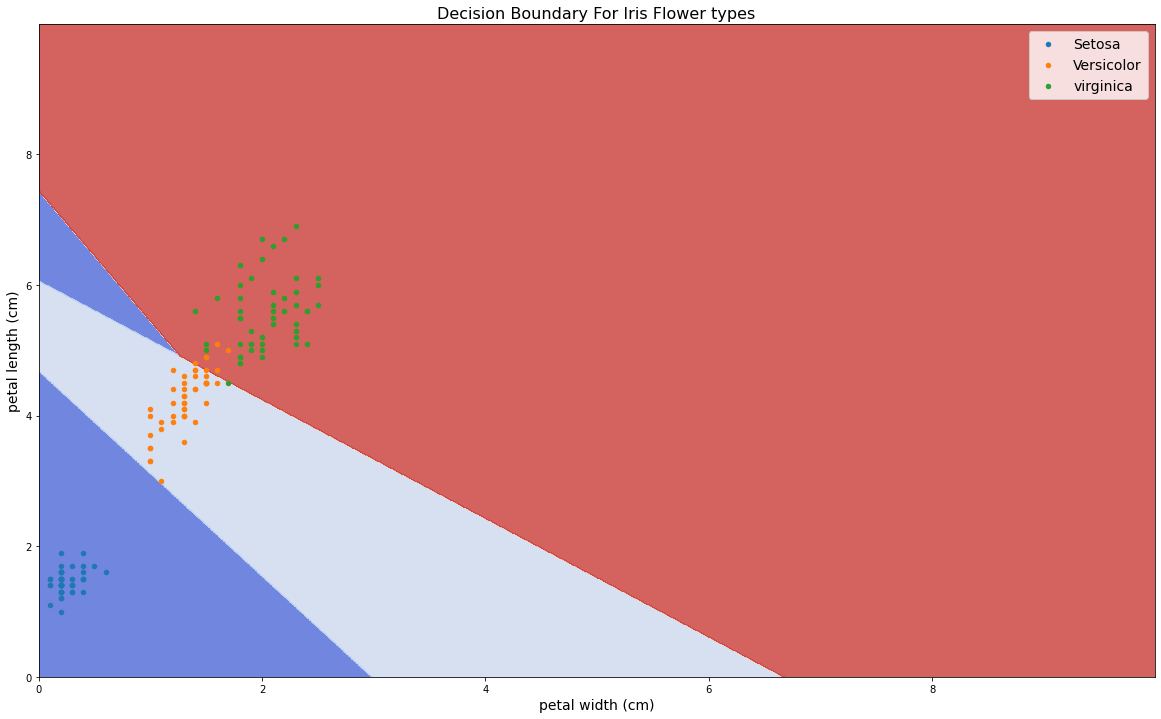

In [513]:
plt.figure(figsize=(20,12))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x[3][:50], x[2][:50], s=20, label='Setosa')
plt.scatter(x[3][50:100], x[2][50:100], s=20, label='Versicolor')
plt.scatter(x[3][100:150], x[2][100:150], s=20, label='virginica')
plt.title('Decision Boundary For Iris Flower types', fontsize=16)
plt.xlabel('petal width (cm)', fontsize=14)
plt.ylabel('petal length (cm)', fontsize=14)
plt.legend(fontsize=14)
plt.show()

# Regression

Given that a flower is either Iris Versicolor or Iris Virginica, is possible to calculate it's petal length given that we know the flower's petal width. This is a simple linear regression problem. One can see from the scatter plots above that petal width and petal length have a linear relationship. 

# Logistic Regression

Logistic regression is a great technique for binary classification tasks and we will use it to distinguish between versicolor and virginica.

In [514]:
from sklearn.linear_model import LogisticRegression

In [515]:
X = df.drop(columns = 'target')
X = X[50:150]
y = df['target'][50:150]

In [516]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

In [517]:
model = LogisticRegression()

In [518]:
model.fit(X_train, y_train)

LogisticRegression()

In [519]:
y_pred = model.predict(X_test)

In [520]:
LR_accuracy = accuracy_score(y_test, y_pred)

In [521]:
LR_accuracy

1.0

In [522]:
y_pred

array([2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 2, 2])

In this instance the logistic regression classifier worked even better than the support vector machine classifier. This probably because there is no clear linear separation between these two flower types in the feature space. So it is far better to use logistic regression to classify between versicolor and virginica.

# Decision Tree Classifier

In [523]:
from sklearn import tree

## Splitting the Dataset

In [524]:
X = df.drop(columns = 'target', axis=1) 
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

## Fitting the Decision Tree Model to the training Data

In [525]:
model = tree.DecisionTreeClassifier()

In [526]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Tree Visualization

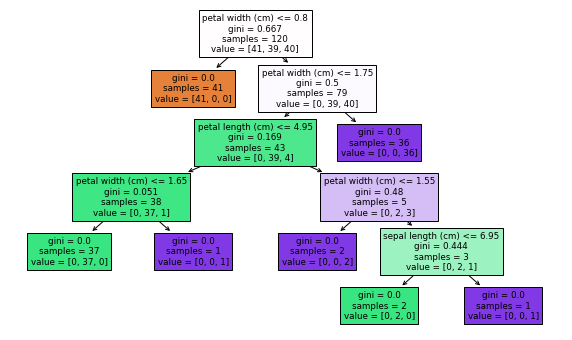

In [527]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6))
plot_tree(model, filled = True, feature_names = iris.feature_names)
plt.show()

## Making Predictions

In [528]:
y_pred = model.predict(X_test)

In [529]:
y_pred

array([0, 2, 1, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 0,
       1, 2, 1, 0, 2, 2, 0, 1])

## Model Evaluation

In [530]:
model_score = accuracy_score(y_test, y_pred)

In [531]:
model_score

0.9666666666666667

In [532]:
cm = confusion_matrix(y_test, y_pred)

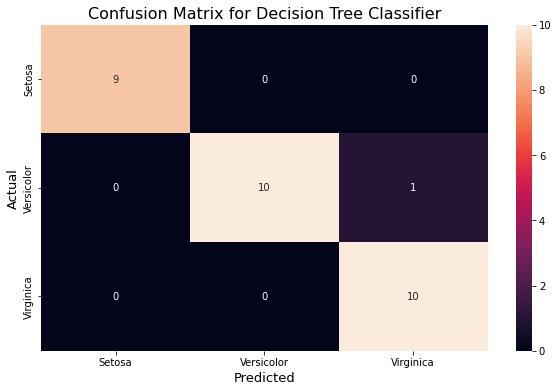

In [533]:
x_labels = ['Setosa', 'Versicolor', 'Virginica']
plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for Decision Tree Classifier', fontsize=16)
sns.heatmap(cm, xticklabels = x_labels, yticklabels = x_labels, annot = True)
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.show()

Petal width is by far the most important feature for the decision tree. This is followed by petal length. So in general iris flowers are better classified by their petals.

# K Means Clustering

We will end with an unsupervised machine learning algorithm. K means clustering is an unsupervised machine learning algorithm that divides a dataset into k clusters based on how similar they are in the feature space.

## Importing K Means Clustering Algorithm

In [534]:
from sklearn.cluster import KMeans

## Determing K (Elbow Method)

In [535]:
k_range = list(range(1, 11))
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(X_train, y_train)
    sse.append(km.inertia_)

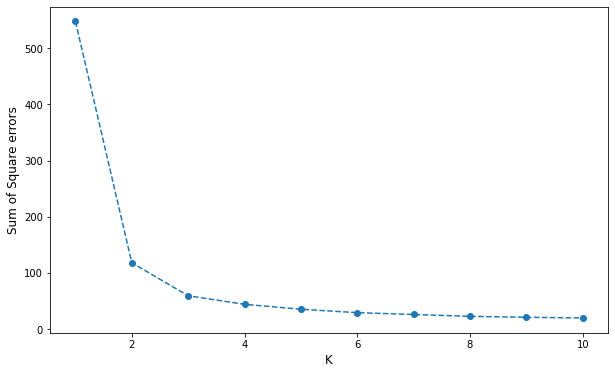

In [536]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, '--')
plt.scatter(k_range, sse)
plt.xlabel('K', fontsize = 12)
plt.ylabel('Sum of Square errors', fontsize = 12)
plt.show()

In [572]:
from sklearn.preprocessing import StandardScaler

## Data Scaling

In [573]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

We can see here that the elbow is at k = 3, which is the optimal number of clusters for our dataset.

In [597]:
sd = pd.DataFrame(data = scaled_data, columns = iris.feature_names)

In [598]:
km = KMeans(n_clusters = 3)
km.fit(scaled_data, y)

KMeans(n_clusters=3)

In [599]:
y_pred = km.predict(scaled_data)

In [605]:
sd['Cluster'] = y_pred

In [606]:
km.cluster_centers_

array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [607]:
cc = km.cluster_centers_[:,2:]

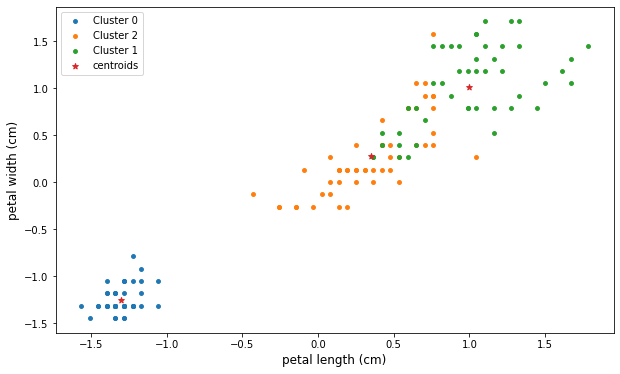

In [608]:
sd1 = sd[sd.Cluster == 0]
sd2 = sd[sd.Cluster == 1]
sd3 = sd[sd.Cluster == 2]
plt.figure(figsize=(10, 6))
plt.xlabel('petal length (cm)', fontsize = 12)
plt.ylabel('petal width (cm)', fontsize = 12)
plt.scatter(sd1['petal length (cm)'], sd1['petal width (cm)'], s = 15, label = 'Cluster 0')
plt.scatter(sd2['petal length (cm)'], sd2['petal width (cm)'], s = 15, label = 'Cluster 2')
plt.scatter(sd3['petal length (cm)'], sd3['petal width (cm)'], s = 15, label = 'Cluster 1')
plt.scatter(cc[:,0], cc[:, 1], marker = '*', label = 'centroids')
plt.legend()
plt.show()

In conclusion k means clustering finds it difficult to distinguish between versicolor and virginica iris flower types. However, it perfectly distinguishes iris setosa from the other two iris flower types like most of the other algorithms we have seen. The best method to distinguish between iris versicolor and iris virginica is to use logistic regression.